In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("D:\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### filling missing values and drop column cabin

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin', axis=1, inplace=True, errors='ignore')


In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

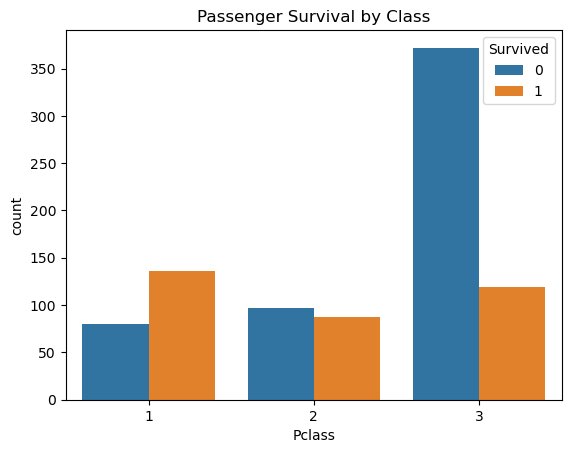

In [15]:
sns.countplot(x='Pclass', data=df,hue='Survived')
plt.title('Passenger Survival by Class')
plt.show()

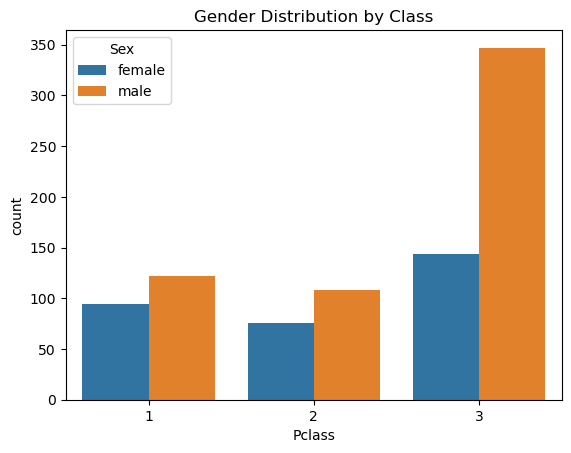

In [16]:
sns.countplot(x='Pclass', hue='Sex', data=df)
plt.title('Gender Distribution by Class')
plt.show()

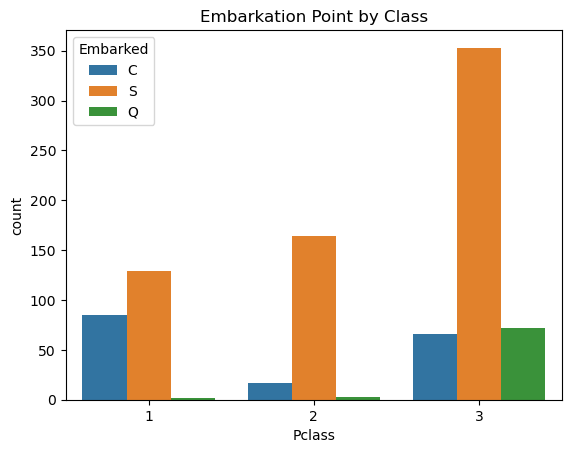

In [17]:
sns.countplot(x='Pclass', hue='Embarked', data=df)
plt.title('Embarkation Point by Class')
plt.show()

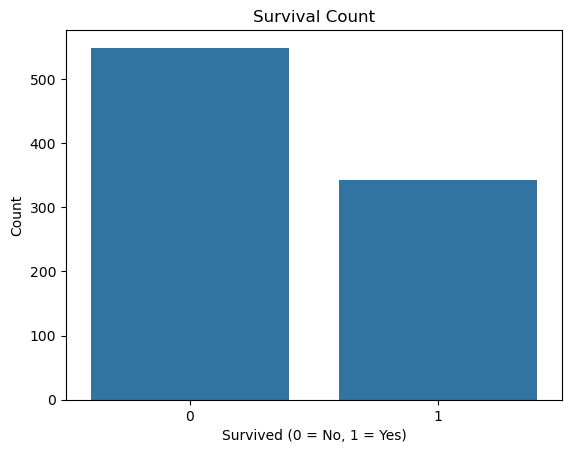

In [18]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [19]:
numeric_data = df.select_dtypes(include='number')
corr = numeric_data.corr()

<Axes: >

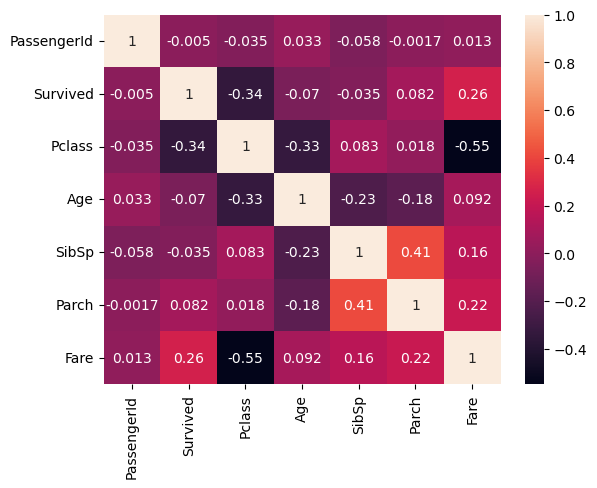

In [20]:
sns.heatmap(corr,annot = True)

#### Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [22]:
X = df.drop(['PassengerId','Name','Ticket','Survived'],axis=1)

In [23]:
y = df['Survived']

In [24]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

#### helper function

In [26]:
#helper function
scores =[]
model_names=[]
def run_model(model, X_train, y_train, X_test, y_test):
    # Fit the model Training
    model.fit(X_train, y_train)

    # Get the Metrics
    predictions = model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    print(classification_report(y_test, predictions))
    model_names.append(type(model).__name__)
    scores.append(accuracy_score(y_test,predictions))

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



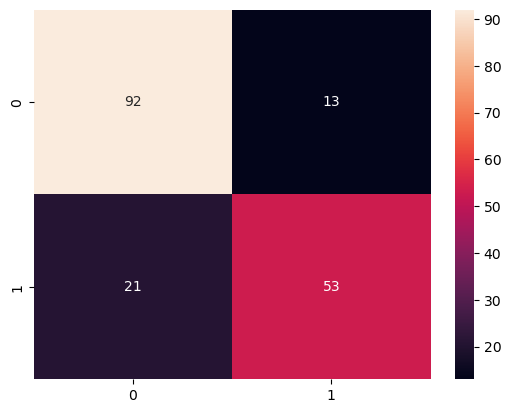

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
run_model(model, X_train, y_train, X_test, y_test)

#### KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[3,5,7,9]}
grid = GridSearchCV(knn, param_grid)

le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex']) 

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       105
           1       0.66      0.54      0.59        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.67       179
weighted avg       0.69      0.69      0.69       179



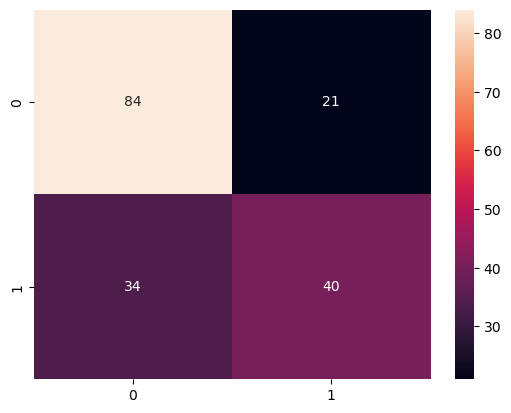

In [29]:
model = KNeighborsClassifier(n_neighbors=7)
run_model(model, X_train, y_train, X_test, y_test)

#### Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
param_grids = {
    'max_depth':[10,20,30]
    
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grids)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10}

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       105
           1       0.85      0.64      0.73        74

    accuracy                           0.80       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



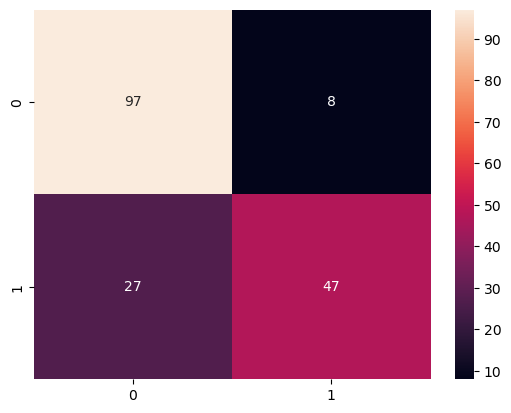

In [31]:
model = DecisionTreeClassifier(max_depth=10)
run_model(model, X_train, y_train, X_test, y_test)

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [60, 70, 80,90, 100]
max_features = [2, 3, 4]
bootstrap = [True, False]
oob_score = [True, False]

param_grids = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'bootstrap':bootstrap,
    'oob_score':oob_score
}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grids)
grid.fit(X_train, y_train)
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 80, 'oob_score': True}

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



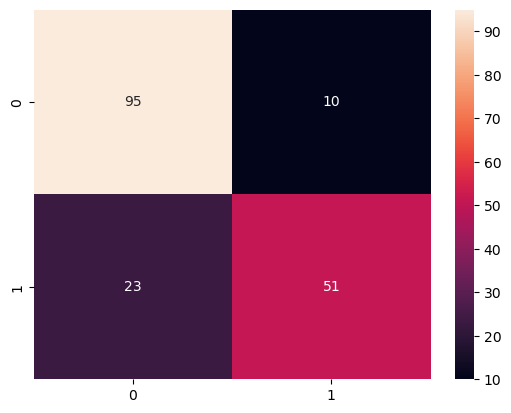

In [33]:
model = RandomForestClassifier(bootstrap = True, max_features = 4, n_estimators = 60, oob_score = False)
run_model(model, X_train, y_train, X_test, y_test)

#### SVC

In [34]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm=SVC()
param_grid = {'C':[0.01, 0.1, 1], 
              'kernel':['rbf', 'linear'],
              'gamma':['scale', 'auto']
             }
grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       105
           1       0.80      0.11      0.19        74

    accuracy                           0.62       179
   macro avg       0.70      0.54      0.47       179
weighted avg       0.69      0.62      0.52       179



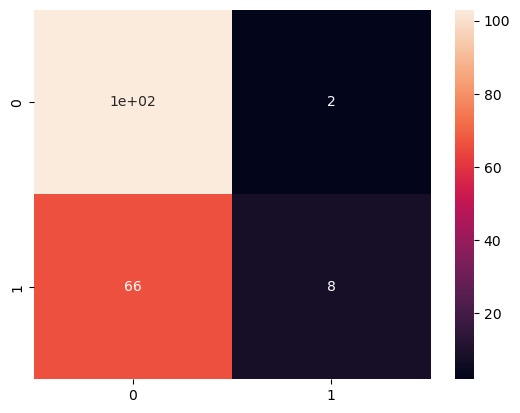

In [42]:
model = SVC(kernel="poly", degree=5, C=0.1)
run_model(model, X_train, y_train, X_test, y_test)

#### Gradient Boosting

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179



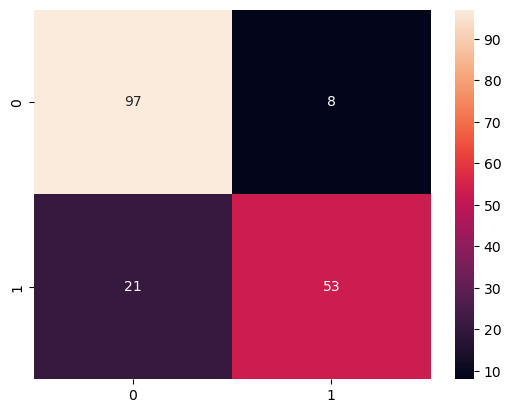

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier (n_estimators= 300)
run_model(model, X_train, y_train, X_test, y_test)

#### Ada Boosting

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



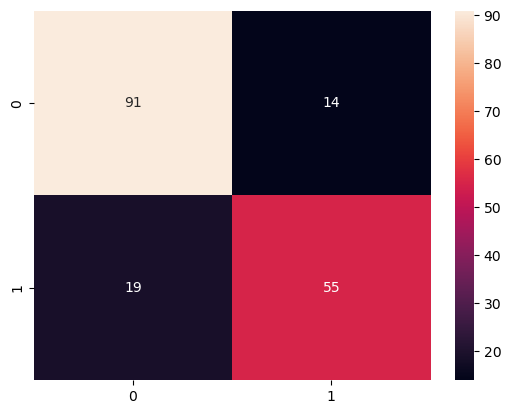

In [46]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=42)
run_model(model, X_train, y_train, X_test, y_test)

In [47]:
data = pd.DataFrame({
                     'Model' : model_names,
                     'Score' : scores
})
data.sort_values(by='Score',ascending=False)

,Model,Score
4,SVC,0.843575
8,SVC,0.843575
5,GradientBoostingClassifier,0.837989
11,GradientBoostingClassifier,0.837989
13,GradientBoostingClassifier,0.837989
12,GradientBoostingClassifier,0.832402
3,RandomForestClassifier,0.815642
6,AdaBoostClassifier,0.815642
14,AdaBoostClassifier,0.815642
0,LogisticRegression,0.810056


SVC is best for this dataset

In [ ]:
import pandas as pd

In [ ]:
print(df.head())